In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [2]:
train=pd.read_csv('train_V2.csv')

In [3]:
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [4]:
train.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
#一共多少数据
train.shape

(4446966, 29)

In [7]:
np.unique(train['matchId']).shape #找出唯一值

(47965,)

In [8]:
#有多少支队伍
np.unique(train['groupId']).shape

(2026745,)

In [9]:
#数据基本处理

In [10]:
#缺失值处理
np.any(train.isnull())

True

In [11]:
train[train["winPlacePerc"].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [12]:
train.drop(2744604,inplace=True)

In [13]:
train.shape

(4446965, 29)

In [14]:
#特征数据规范化处理
##查看每场比赛的人数

In [15]:
count = train.groupby("matchId")["matchId"].transform("count")

In [16]:
train["playersJoined"] = count

In [17]:
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.000,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.040,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.000,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.000,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.000,0,0,49.75,2,0,0.1875,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786,94
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0.0000,0,0.000,0,0,81.70,6,0,0.2935,93
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0.0000,0,2.184,0,0,788.70,4,0,0.4815,98
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0.0000,0,0.000,0,0,2748.00,8,0,0.8000,94


In [18]:
train["playersJoined"].sort_values().head()

1206365    2
2109739    2
3956552    5
3620228    5
696000     5
Name: playersJoined, dtype: int64

In [ ]:
plt.figure(figsize=(20, 8))
sns.countplot(train["playersJoined"])
plt.grid()
plt.show()

In [ ]:
#筛选>75的值
#train=train[train["playersJoined"]>=75]

In [ ]:
train.shape

(4446965, 30)

D:\Anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


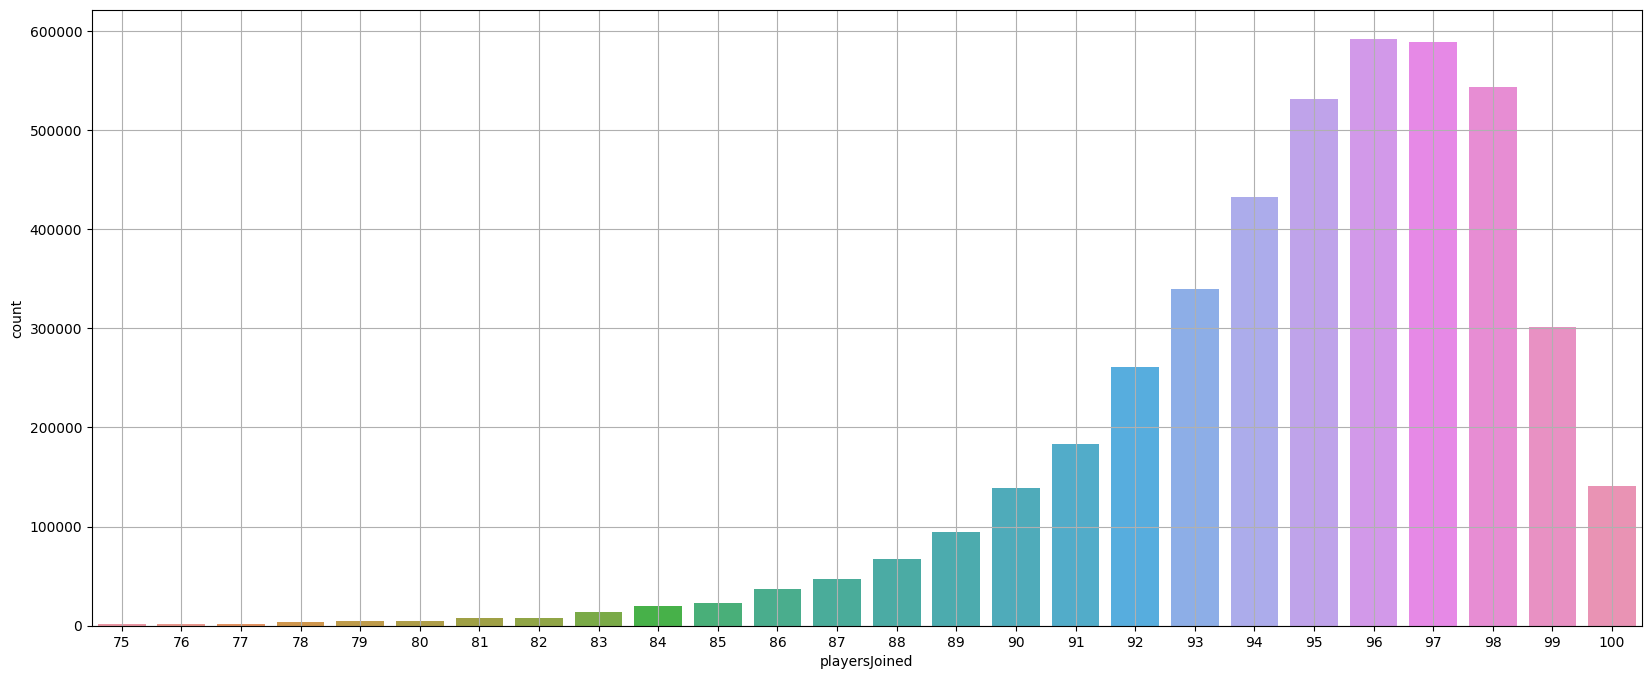

In [ ]:
plt.figure(figsize=(20, 8))
sns.countplot(train[train["playersJoined"]>=75]["playersJoined"])
plt.grid()
plt.show()

#规范化输出部分数据

In [ ]:
train["killsNorm"] = train["kills"] * ((100-train["playersJoined"])/100+1)

In [ ]:
train["damageDealtNorm"]=train["damageDealt"]*((100-train["playersJoined"])/100+1)

In [ ]:
train["maxPlaceNorm"]=train["maxPlace"]*((100-train["playersJoined"])/100+1)

In [ ]:
train["matchDurationNorm"]=train["matchDuration"]*((100-train["playersJoined"])/100+1)

In [ ]:
train.shape

(4446965, 34)

#部分变量合成

In [ ]:
train["healsandboosts"]=train["heals"]+train["boosts"]

In [ ]:
train[['heals','boosts','healsandboosts']].tail(10)

,heals,boosts,healsandboosts
4446956,1,0,1
4446957,0,1,1
4446958,0,0,0
4446959,0,0,0
4446960,0,0,0
4446961,0,0,0
4446962,0,1,1
4446963,0,0,0
4446964,2,4,6
4446965,1,2,3


#异常值处理

#删除有击杀但是没移动的玩家

In [ ]:
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,244.80,1,1466,0.4444,96,0.00,0.0000,29.12,1358.24,0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,1434.00,5,0,0.6400,91,0.00,99.7023,28.34,1936.93,0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,161.80,2,0,0.7755,98,0.00,69.3600,51.00,1344.36,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,202.70,3,0,0.1667,91,0.00,35.8610,33.79,1565.24,0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,49.75,2,0,0.1875,97,1.03,103.0000,99.91,1466.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,1019.00,3,1507,0.1786,94,0.00,0.0000,30.74,1985.38,0
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,81.70,6,0,0.2935,93,0.00,47.2405,99.51,1535.45,1
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,788.70,4,0,0.4815,98,0.00,60.2412,28.56,1347.42,0
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2748.00,8,0,0.8000,94,2.12,191.2240,27.56,1455.38,6


In [ ]:
train['totalDistance']=train["rideDistance"]+train['walkDistance']+train['swimDistance']

In [ ]:
train['killwithoutMoving']=(train["kills"]>0)&(train['totalDistance']==0)

In [ ]:
train[train['killwithoutMoving']==True].shape

(1535, 37)

#删除这堆数据

In [ ]:
train.drop(train[train['killwithoutMoving']==True].index,inplace=True)

In [ ]:
train.shape

(4445430, 37)

In [ ]:
#驾车杀敌数异常的数据
#train['roadKills']>10

In [ ]:
train.drop(train[train['roadKills']>10].index,inplace=True)
train.shape

(4445426, 37)

In [ ]:
#删除玩家杀敌数超过30人的数据
train.drop(train[train['kills']>30].index,inplace=True)
train.shape

(4445331, 37)

In [ ]:
#爆头率异常数据
train['headshot_rate']=train['headshotKills']/train['kills']
train['headshot_rate']

0          NaN
1          NaN
2          NaN
3          NaN
4          0.0
          ... 
4446961    NaN
4446962    NaN
4446963    NaN
4446964    0.5
4446965    0.0
Name: headshot_rate, Length: 4445331, dtype: float64

In [ ]:
#替换nan
train['headshot_rate']=train['headshot_rate'].fillna(0)

In [ ]:
#删除爆头率异常的数据
train.drop(train[(train['headshot_rate']==1)&(train['kills']>9)].index,inplace=True)

In [ ]:
train.shape

(4445307, 38)

In [ ]:
###删除最远杀敌距离异常问题
train.drop(train[train['longestKill']>=1000].index,inplace=True)

In [ ]:
train.shape

(4445287, 38)

In [ ]:
###删除运动距离异常值
#行走异常值
train.drop(train[train["walkDistance"]>10000].index,inplace=True)
train.shape

(4445068, 38)

In [ ]:
#载具异常
train.drop(train[train['rideDistance']>20000].index,inplace=True)
train.shape

(4444918, 38)

In [ ]:
#游泳距离异常
train.drop(train[train['swimDistance']>20000].index,inplace=True)
train.shape

(4444918, 38)

In [ ]:
#武器搜集异常
train.drop(train[train['weaponsAcquired']>=80].index,inplace=True)
train.shape

(4444899, 38)

In [ ]:
#使用治疗药品数量异常
train.drop(train[train['heals']>=80].index,inplace=True)
train.shape

(4444898, 38)

#类别型数据处理

In [ ]:
train['matchType'].unique()#去重

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [ ]:
train=pd.get_dummies(train,columns=['matchType'])

In [ ]:
match_encoding=train.filter(regex="matchType")#通过对名为 “train” 的对象使用 “filter” 方法进行筛选得到的，筛选条件是包含正则表达式 “matchType” 的列

In [ ]:
match_encoding.head()

,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


##对groupId和matchId等数据进行处理

In [ ]:
train['groupId'].astype("category")

0          4d4b580de459be
1          684d5656442f9e
2          6a4a42c3245a74
3          a930a9c79cd721
4          de04010b3458dd
                ...      
4446961    d238e426f50de7
4446962    408cdb5c46b2ac
4446963    e26ac84bdf7cef
4446964    c2223f35411394
4446965    8c74f72fedf5ff
Name: groupId, Length: 4444898, dtype: category
Categories (2026242, object): ['00000c08b5be36', '00000d1cbbc340', '000025a09dd1d7', '000038ec4dff53', ..., 'fffff305a0133d', 'fffff32bc7eab9', 'fffff7edfc4050', 'fffff98178ef52']

In [ ]:
train['groupId']=train['groupId'].astype("category")
train['groupId_cat']=train['groupId'].cat.codes
train['groupId_cat'].head()

0     613619
1     827616
2     843307
3    1340122
4    1757411
Name: groupId_cat, dtype: int32

In [ ]:
train['matchId']=train['matchId'].astype("category")
train['matchId_cat']=train['matchId'].cat.codes
train['matchId_cat'].head()

0    30085
1    32751
2     3143
3    45260
4    20531
Name: matchId_cat, dtype: int32

In [ ]:
#进行删除
train.drop(['groupId',"matchId"],axis=1,inplace=True)
train.head()

,Id,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupId_cat,matchId_cat
0,7f96b2f878858a,0,0,0.00,0,0,0,60,1241,0,...,0,0,0,0,0,0,0,1,613619,30085
1,eef90569b9d03c,0,0,91.47,0,0,0,57,0,0,...,0,0,0,0,0,0,0,1,827616,32751
2,1eaf90ac73de72,1,0,68.00,0,0,0,47,0,0,...,0,0,0,0,0,0,0,0,843307,3143
3,4616d365dd2853,0,0,32.90,0,0,0,75,0,0,...,0,0,0,0,0,0,0,1,1340122,45260
4,315c96c26c9aac,0,0,100.00,0,0,0,45,0,1,...,0,0,0,0,0,1,0,0,1757411,20531


In [ ]:
#数据截取、确定特征值、目标值，选择前10000条数据
sample=1000000
df_sample=train.sample(sample)
df=df_sample.drop(['winPlacePerc','Id'],axis=1)

In [ ]:
y=df_sample['winPlacePerc']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.2)

In [ ]:
x_train.shape

(800000, 51)

In [ ]:
y_train.shape

(800000,)

In [ ]:
#进行模型训练

In [ ]:
m1=RandomForestRegressor(n_estimators=40,min_samples_leaf=3,max_features="sqrt",n_jobs=-1)
m1.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [ ]:
y_pre=m1.predict(x_test)
m1.score(x_test,y_test)
mean_absolute_error(y_test,y_pre)

0.06116976582126468

In [ ]:
#再次使用随机森林进行模型训练
m1.feature_importances_

array([3.21686603e-03, 6.05634553e-02, 1.18399090e-02, 2.52902840e-03,
       1.09168447e-03, 9.10802749e-03, 2.10129748e-01, 1.94943228e-03,
       7.58234065e-03, 1.17695038e-02, 2.07272902e-02, 1.01339011e-02,
       5.75178423e-03, 7.54127966e-03, 3.41212734e-03, 1.02276345e-03,
       2.57105674e-02, 2.89618454e-05, 2.20730091e-03, 1.18907085e-04,
       2.62890779e-05, 2.10902978e-01, 4.04821631e-02, 2.32239466e-03,
       6.60131066e-03, 2.07953133e-02, 8.22185774e-03, 6.82764384e-03,
       1.16637680e-02, 8.80195573e-02, 1.94666874e-01, 0.00000000e+00,
       9.16236971e-04, 5.01133468e-05, 1.34589152e-07, 2.07479196e-04,
       4.72356063e-04, 5.69616912e-07, 3.08664411e-06, 1.17414399e-07,
       5.91605824e-05, 3.27772860e-07, 7.75411825e-06, 6.87121130e-07,
       2.57036521e-04, 1.68237165e-04, 9.60732103e-04, 1.01004403e-03,
       9.06283639e-04, 4.02808968e-03, 3.98652443e-03])

In [ ]:
imp_df=pd.DataFrame({"cols":df.columns,"imp":m1.feature_importances_})
imp_df

,cols,imp
0,assists,3.216866e-03
1,boosts,6.056346e-02
2,damageDealt,1.183991e-02
3,DBNOs,2.529028e-03
4,headshotKills,1.091684e-03
5,heals,9.108027e-03
6,killPlace,2.101297e-01
7,killPoints,1.949432e-03
8,kills,7.582341e-03
9,killStreaks,1.176950e-02


In [ ]:
imp_df=imp_df.sort_values("imp",ascending=False)

<AxesSubplot:ylabel='cols'>

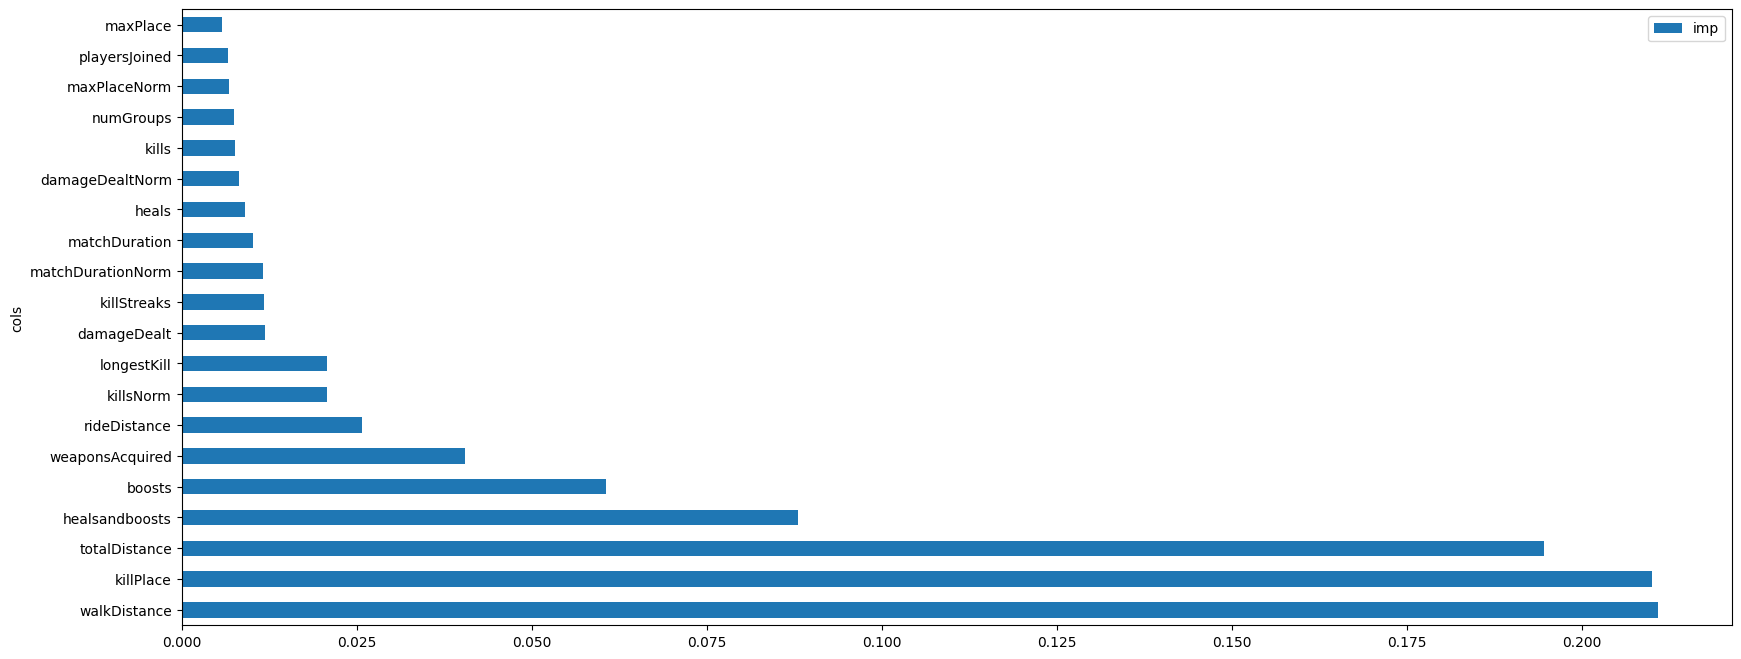

In [ ]:
imp_df[:20].plot("cols","imp",figsize=(20,8),kind="barh")

In [ ]:
to_keep=imp_df[imp_df.imp>0.005].cols

In [ ]:
to_keep.shape

(20,)

In [ ]:
df_keep=df[to_keep]

In [ ]:
df_keep

,walkDistance,killPlace,totalDistance,healsandboosts,boosts,weaponsAcquired,rideDistance,killsNorm,longestKill,damageDealt,killStreaks,matchDurationNorm,matchDuration,heals,damageDealtNorm,kills,numGroups,maxPlaceNorm,playersJoined,maxPlace
1094236,0.00,94,0.00,0,0,0,0.0,0.00,0.00,0.00,0,1386.48,1308,0,0.0000,0,27,28.62,94,27
1437870,62.51,82,62.51,0,0,2,0.0,0.00,0.00,79.85,0,1396.68,1356,0,82.2455,0,95,99.91,97,97
3252969,445.00,17,445.00,1,0,3,0.0,2.06,23.59,162.30,1,1381.23,1341,1,167.1690,2,25,28.84,97,28
3281892,40.86,76,40.86,0,0,1,0.0,0.00,0.00,28.08,0,1596.20,1388,0,32.2920,0,39,49.45,85,43
3601456,123.90,95,123.90,0,0,1,0.0,0.00,0.00,0.00,0,1501.50,1430,0,0.0000,0,26,28.35,95,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068834,2370.00,51,2370.00,0,0,8,0.0,0.00,0.00,160.80,0,1390.00,1390,0,160.8000,0,29,30.00,100,30
625896,1753.00,45,7879.00,12,1,2,6126.0,0.00,0.00,0.00,0,2004.11,1873,11,0.0000,0,26,29.96,93,28
1219771,1069.00,60,1965.80,5,4,6,896.8,0.00,0.00,317.20,0,1333.85,1295,1,326.7160,0,29,29.87,97,29
3704331,257.40,25,257.40,2,0,2,0.0,2.02,49.33,207.20,2,1452.38,1438,2,209.2720,2,50,50.50,99,50


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df_keep,y,test_size=0.2)

In [ ]:
m2=RandomForestRegressor(n_estimators=40,min_samples_leaf=3,max_features="sqrt",n_jobs=-1)
m2.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [ ]:
y_pre=m2.predict(x_test)
m2.score(x_test,y_test)

0.9251932283474708

In [ ]:
mean_absolute_error(y_test,y_pre)

0.059527978824937856

#使用lightGBM进行模型训练

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.2)

In [ ]:
x_train.shape

(800000, 51)

In [ ]:
gbm=lgb.LGBMRegressor(objective="regression",num_leaves=31,learning_rate=0.05,n_estimators=20)

In [ ]:
gbm.fit(x_train,y_train,eval_set=[(x_test,y_test)],eval_metric="l1",early_stopping_rounds=5)

[1]	valid_0's l1: 0.255592	valid_0's l2: 0.0864345
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.244517	valid_0's l2: 0.0793198
[3]	valid_0's l1: 0.234025	valid_0's l2: 0.0728874
[4]	valid_0's l1: 0.224177	valid_0's l2: 0.0670829
[5]	valid_0's l1: 0.214824	valid_0's l2: 0.0617922
[6]	valid_0's l1: 0.206028	valid_0's l2: 0.057025
[7]	valid_0's l1: 0.197685	valid_0's l2: 0.0526924
[8]	valid_0's l1: 0.189842	valid_0's l2: 0.04878
[9]	valid_0's l1: 0.182378	valid_0's l2: 0.0452118
[10]	valid_0's l1: 0.175426	valid_0's l2: 0.0420121
[11]	valid_0's l1: 0.168838	valid_0's l2: 0.0390949
[12]	valid_0's l1: 0.162585	valid_0's l2: 0.036434
[13]	valid_0's l1: 0.156712	valid_0's l2: 0.034023
[14]	valid_0's l1: 0.151105	valid_0's l2: 0.0318117
[15]	valid_0's l1: 0.145907	valid_0's l2: 0.0298364
[16]	valid_0's l1: 0.140925	valid_0's l2: 0.0280163
[17]	valid_0's l1: 0.136373	valid_0's l2: 0.0263892
[18]	valid_0's l1: 0.131948	valid_0's l2: 0.0248848
[19]	valid_0's l1:

LGBMRegressor(learning_rate=0.05, n_estimators=20, objective='regression')

In [ ]:
y_pre=gbm.predict(x_test,num_iteration=gbm.best_iteration_)

array([0.56026563, 0.71739597, 0.35555799, ..., 0.42720804, 0.32290767,
       0.67227628])

In [ ]:
mean_absolute_error(y_test,y_pre)

0.34546290653387784

In [ ]:
#对模型进行调优


In [ ]:
estimator=lgb.LGBMRegressor(num_leaves=31)
param_grid={
    "learning_rate":[0.01,0.1,1],
    "n_estimators":[40,60,80,100,200,300]
}
gbm1=GridSearchCV(estimator,param_grid=param_grid,cv=5,n_jobs=-1)
gbm1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [40, 60, 80, 100, 200, 300]})

In [ ]:
y_pre=gbm1.predict(x_test)
mean_absolute_error(y_test,y_pre)

0.0557545287225654

In [ ]:
gbm1.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

In [ ]:
#模型第三次调优【思路】

In [ ]:
#n_estimators
score=[]
n_estimators=[100,300,500,800]
for nes in n_estimators:
    lgbm=lgb.LGBMRegressor(boosting_type="gbdt",
                           num_leaves=31,
                           learning_rate=0.1,
                           max_depth=5,
                           n_estimators=nes,
                           min_child_samples=20,
                           n_jobs=-1)
    lgbm.fit(x_train,y_train,eval_set=[(x_test,y_test)],eval_metric="l1",early_stopping_rounds=5)
    y_pre=lgbm.predict(x_test)
    mae=mean_absolute_error(y_test,y_pre)
    score.append(mae)
    print("本次结果输出的mae值为:",mae)

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's l1: 0.244355	valid_0's l2: 0.0791906
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.223931	valid_0's l2: 0.0669202
[3]	valid_0's l1: 0.205977	valid_0's l2: 0.056994
[4]	valid_0's l1: 0.189774	valid_0's l2: 0.0488078
[5]	valid_0's l1: 0.175418	valid_0's l2: 0.0421379
[6]	valid_0's l1: 0.162877	valid_0's l2: 0.03669
[7]	valid_0's l1: 0.151648	valid_0's l2: 0.0322269
[8]	valid_0's l1: 0.141565	valid_0's l2: 0.028468
[9]	valid_0's l1: 0.132783	valid_0's l2: 0.0254272
[10]	valid_0's l1: 0.1252	valid_0's l2: 0.0229662
[11]	valid_0's l1: 0.118222	valid_0's l2: 0.0208474
[12]	valid_0's l1: 0.11185	valid_0's l2: 0.0189892
[13]	valid_0's l1: 0.106071	valid_0's l2: 0.0173821
[14]	valid_0's l1: 0.101362	valid_0's l2: 0.0161827
[15]	valid_0's l1: 0.0971519	valid_0's l2: 0.0151823
[16]	valid_0's l1: 0.0931049	valid_0's l2: 0.0141882
[17]	valid_0's l1: 0

[47]	valid_0's l1: 0.0627794	valid_0's l2: 0.00781135
[48]	valid_0's l1: 0.0625884	valid_0's l2: 0.00777058
[49]	valid_0's l1: 0.0624747	valid_0's l2: 0.00775051
[50]	valid_0's l1: 0.0623392	valid_0's l2: 0.00772204
[51]	valid_0's l1: 0.0622376	valid_0's l2: 0.00770042
[52]	valid_0's l1: 0.0620727	valid_0's l2: 0.0076559
[53]	valid_0's l1: 0.0619776	valid_0's l2: 0.00763583
[54]	valid_0's l1: 0.0618822	valid_0's l2: 0.00761433
[55]	valid_0's l1: 0.061774	valid_0's l2: 0.00759089
[56]	valid_0's l1: 0.0616814	valid_0's l2: 0.00757019
[57]	valid_0's l1: 0.0615997	valid_0's l2: 0.00755125
[58]	valid_0's l1: 0.0614889	valid_0's l2: 0.00752616
[59]	valid_0's l1: 0.0613681	valid_0's l2: 0.00749531
[60]	valid_0's l1: 0.0613023	valid_0's l2: 0.00747911
[61]	valid_0's l1: 0.0612469	valid_0's l2: 0.00746481
[62]	valid_0's l1: 0.061176	valid_0's l2: 0.00744757
[63]	valid_0's l1: 0.0610778	valid_0's l2: 0.00742393
[64]	valid_0's l1: 0.0610201	valid_0's l2: 0.0074099
[65]	valid_0's l1: 0.0609311	val

[201]	valid_0's l1: 0.057046	valid_0's l2: 0.00640498
[202]	valid_0's l1: 0.057038	valid_0's l2: 0.00640271
[203]	valid_0's l1: 0.0570315	valid_0's l2: 0.00640139
[204]	valid_0's l1: 0.0570287	valid_0's l2: 0.00640013
[205]	valid_0's l1: 0.0570149	valid_0's l2: 0.00639767
[206]	valid_0's l1: 0.0570104	valid_0's l2: 0.00639694
[207]	valid_0's l1: 0.0570035	valid_0's l2: 0.00639552
[208]	valid_0's l1: 0.056993	valid_0's l2: 0.00639319
[209]	valid_0's l1: 0.0569868	valid_0's l2: 0.00639189
[210]	valid_0's l1: 0.0569842	valid_0's l2: 0.00639074
[211]	valid_0's l1: 0.0569756	valid_0's l2: 0.00638977
[212]	valid_0's l1: 0.0569677	valid_0's l2: 0.00638819
[213]	valid_0's l1: 0.0569603	valid_0's l2: 0.0063874
[214]	valid_0's l1: 0.0569573	valid_0's l2: 0.006386
[215]	valid_0's l1: 0.0569388	valid_0's l2: 0.00637974
[216]	valid_0's l1: 0.0569098	valid_0's l2: 0.00637321
[217]	valid_0's l1: 0.0569055	valid_0's l2: 0.006372
[218]	valid_0's l1: 0.0568873	valid_0's l2: 0.00636839
[219]	valid_0's l1

[48]	valid_0's l1: 0.0625884	valid_0's l2: 0.00777058
[49]	valid_0's l1: 0.0624747	valid_0's l2: 0.00775051
[50]	valid_0's l1: 0.0623392	valid_0's l2: 0.00772204
[51]	valid_0's l1: 0.0622376	valid_0's l2: 0.00770042
[52]	valid_0's l1: 0.0620727	valid_0's l2: 0.0076559
[53]	valid_0's l1: 0.0619776	valid_0's l2: 0.00763583
[54]	valid_0's l1: 0.0618822	valid_0's l2: 0.00761433
[55]	valid_0's l1: 0.061774	valid_0's l2: 0.00759089
[56]	valid_0's l1: 0.0616814	valid_0's l2: 0.00757019
[57]	valid_0's l1: 0.0615997	valid_0's l2: 0.00755125
[58]	valid_0's l1: 0.0614889	valid_0's l2: 0.00752616
[59]	valid_0's l1: 0.0613681	valid_0's l2: 0.00749531
[60]	valid_0's l1: 0.0613023	valid_0's l2: 0.00747911
[61]	valid_0's l1: 0.0612469	valid_0's l2: 0.00746481
[62]	valid_0's l1: 0.061176	valid_0's l2: 0.00744757
[63]	valid_0's l1: 0.0610778	valid_0's l2: 0.00742393
[64]	valid_0's l1: 0.0610201	valid_0's l2: 0.0074099
[65]	valid_0's l1: 0.0609311	valid_0's l2: 0.00739103
[66]	valid_0's l1: 0.0608603	val

[203]	valid_0's l1: 0.0570315	valid_0's l2: 0.00640139
[204]	valid_0's l1: 0.0570287	valid_0's l2: 0.00640013
[205]	valid_0's l1: 0.0570149	valid_0's l2: 0.00639767
[206]	valid_0's l1: 0.0570104	valid_0's l2: 0.00639694
[207]	valid_0's l1: 0.0570035	valid_0's l2: 0.00639552
[208]	valid_0's l1: 0.056993	valid_0's l2: 0.00639319
[209]	valid_0's l1: 0.0569868	valid_0's l2: 0.00639189
[210]	valid_0's l1: 0.0569842	valid_0's l2: 0.00639074
[211]	valid_0's l1: 0.0569756	valid_0's l2: 0.00638977
[212]	valid_0's l1: 0.0569677	valid_0's l2: 0.00638819
[213]	valid_0's l1: 0.0569603	valid_0's l2: 0.0063874
[214]	valid_0's l1: 0.0569573	valid_0's l2: 0.006386
[215]	valid_0's l1: 0.0569388	valid_0's l2: 0.00637974
[216]	valid_0's l1: 0.0569098	valid_0's l2: 0.00637321
[217]	valid_0's l1: 0.0569055	valid_0's l2: 0.006372
[218]	valid_0's l1: 0.0568873	valid_0's l2: 0.00636839
[219]	valid_0's l1: 0.0568736	valid_0's l2: 0.00636569
[220]	valid_0's l1: 0.0568652	valid_0's l2: 0.00636385
[221]	valid_0's 

[359]	valid_0's l1: 0.0559727	valid_0's l2: 0.00617714
[360]	valid_0's l1: 0.0559714	valid_0's l2: 0.00617707
[361]	valid_0's l1: 0.0559633	valid_0's l2: 0.00617467
[362]	valid_0's l1: 0.0559617	valid_0's l2: 0.0061744
[363]	valid_0's l1: 0.0559606	valid_0's l2: 0.00617416
[364]	valid_0's l1: 0.0559551	valid_0's l2: 0.00617299
[365]	valid_0's l1: 0.0559546	valid_0's l2: 0.0061731
[366]	valid_0's l1: 0.055952	valid_0's l2: 0.00617257
[367]	valid_0's l1: 0.055952	valid_0's l2: 0.00617245
[368]	valid_0's l1: 0.0559503	valid_0's l2: 0.00617174
[369]	valid_0's l1: 0.0559477	valid_0's l2: 0.00617123
[370]	valid_0's l1: 0.0559462	valid_0's l2: 0.00617081
[371]	valid_0's l1: 0.0559389	valid_0's l2: 0.0061694
[372]	valid_0's l1: 0.0559377	valid_0's l2: 0.00616888
[373]	valid_0's l1: 0.055929	valid_0's l2: 0.00616854
[374]	valid_0's l1: 0.0559152	valid_0's l2: 0.00616563
[375]	valid_0's l1: 0.0559115	valid_0's l2: 0.00616531
[376]	valid_0's l1: 0.0559037	valid_0's l2: 0.00616375
[377]	valid_0's 

[6]	valid_0's l1: 0.162877	valid_0's l2: 0.03669
[7]	valid_0's l1: 0.151648	valid_0's l2: 0.0322269
[8]	valid_0's l1: 0.141565	valid_0's l2: 0.028468
[9]	valid_0's l1: 0.132783	valid_0's l2: 0.0254272
[10]	valid_0's l1: 0.1252	valid_0's l2: 0.0229662
[11]	valid_0's l1: 0.118222	valid_0's l2: 0.0208474
[12]	valid_0's l1: 0.11185	valid_0's l2: 0.0189892
[13]	valid_0's l1: 0.106071	valid_0's l2: 0.0173821
[14]	valid_0's l1: 0.101362	valid_0's l2: 0.0161827
[15]	valid_0's l1: 0.0971519	valid_0's l2: 0.0151823
[16]	valid_0's l1: 0.0931049	valid_0's l2: 0.0141882
[17]	valid_0's l1: 0.0893919	valid_0's l2: 0.0132921
[18]	valid_0's l1: 0.0864659	valid_0's l2: 0.0126737
[19]	valid_0's l1: 0.0840718	valid_0's l2: 0.0121836
[20]	valid_0's l1: 0.0816297	valid_0's l2: 0.0116567
[21]	valid_0's l1: 0.0793376	valid_0's l2: 0.0111539
[22]	valid_0's l1: 0.077489	valid_0's l2: 0.0107791
[23]	valid_0's l1: 0.0760967	valid_0's l2: 0.0105143
[24]	valid_0's l1: 0.0747225	valid_0's l2: 0.0102464
[25]	valid_0'

[164]	valid_0's l1: 0.0574352	valid_0's l2: 0.00649001
[165]	valid_0's l1: 0.0574291	valid_0's l2: 0.00648811
[166]	valid_0's l1: 0.0574124	valid_0's l2: 0.00648433
[167]	valid_0's l1: 0.0574059	valid_0's l2: 0.00648252
[168]	valid_0's l1: 0.0573961	valid_0's l2: 0.00648048
[169]	valid_0's l1: 0.0573858	valid_0's l2: 0.00647846
[170]	valid_0's l1: 0.0573549	valid_0's l2: 0.0064728
[171]	valid_0's l1: 0.0573439	valid_0's l2: 0.00647038
[172]	valid_0's l1: 0.0573394	valid_0's l2: 0.00646912
[173]	valid_0's l1: 0.0573336	valid_0's l2: 0.00646813
[174]	valid_0's l1: 0.0573214	valid_0's l2: 0.00646527
[175]	valid_0's l1: 0.0573171	valid_0's l2: 0.0064643
[176]	valid_0's l1: 0.0573014	valid_0's l2: 0.00646126
[177]	valid_0's l1: 0.0572841	valid_0's l2: 0.00645854
[178]	valid_0's l1: 0.0572757	valid_0's l2: 0.00645693
[179]	valid_0's l1: 0.0572674	valid_0's l2: 0.00645518
[180]	valid_0's l1: 0.0572605	valid_0's l2: 0.00645286
[181]	valid_0's l1: 0.0572514	valid_0's l2: 0.00645121
[182]	valid_

[314]	valid_0's l1: 0.0561958	valid_0's l2: 0.0062185
[315]	valid_0's l1: 0.056193	valid_0's l2: 0.00621821
[316]	valid_0's l1: 0.0561836	valid_0's l2: 0.00621642
[317]	valid_0's l1: 0.0561793	valid_0's l2: 0.00621593
[318]	valid_0's l1: 0.0561741	valid_0's l2: 0.00621504
[319]	valid_0's l1: 0.056167	valid_0's l2: 0.0062137
[320]	valid_0's l1: 0.0561652	valid_0's l2: 0.00621349
[321]	valid_0's l1: 0.0561625	valid_0's l2: 0.00621339
[322]	valid_0's l1: 0.0561614	valid_0's l2: 0.00621309
[323]	valid_0's l1: 0.0561593	valid_0's l2: 0.00621303
[324]	valid_0's l1: 0.0561579	valid_0's l2: 0.00621219
[325]	valid_0's l1: 0.0561427	valid_0's l2: 0.00620909
[326]	valid_0's l1: 0.056138	valid_0's l2: 0.00620786
[327]	valid_0's l1: 0.0561336	valid_0's l2: 0.00620688
[328]	valid_0's l1: 0.0561316	valid_0's l2: 0.00620624
[329]	valid_0's l1: 0.056128	valid_0's l2: 0.00620565
[330]	valid_0's l1: 0.0561217	valid_0's l2: 0.00620483
[331]	valid_0's l1: 0.0561189	valid_0's l2: 0.00620404
[332]	valid_0's 

[464]	valid_0's l1: 0.0556339	valid_0's l2: 0.00611022
[465]	valid_0's l1: 0.0556337	valid_0's l2: 0.00611018
[466]	valid_0's l1: 0.0556329	valid_0's l2: 0.00611015
[467]	valid_0's l1: 0.0556295	valid_0's l2: 0.00610935
[468]	valid_0's l1: 0.0556297	valid_0's l2: 0.0061092
[469]	valid_0's l1: 0.055628	valid_0's l2: 0.00610905
[470]	valid_0's l1: 0.055628	valid_0's l2: 0.00610898
[471]	valid_0's l1: 0.0556245	valid_0's l2: 0.0061084
[472]	valid_0's l1: 0.0556197	valid_0's l2: 0.00610733
[473]	valid_0's l1: 0.0556188	valid_0's l2: 0.0061071
[474]	valid_0's l1: 0.0556162	valid_0's l2: 0.00610656
[475]	valid_0's l1: 0.0556137	valid_0's l2: 0.00610607
[476]	valid_0's l1: 0.0556046	valid_0's l2: 0.00610398
[477]	valid_0's l1: 0.0556042	valid_0's l2: 0.00610384
[478]	valid_0's l1: 0.0556044	valid_0's l2: 0.00610379
[479]	valid_0's l1: 0.0555936	valid_0's l2: 0.00610184
[480]	valid_0's l1: 0.0555877	valid_0's l2: 0.00610073
[481]	valid_0's l1: 0.0555822	valid_0's l2: 0.0060998
[482]	valid_0's 

[620]	valid_0's l1: 0.0553217	valid_0's l2: 0.00604788
[621]	valid_0's l1: 0.0553196	valid_0's l2: 0.00604725
[622]	valid_0's l1: 0.0553152	valid_0's l2: 0.00604723
[623]	valid_0's l1: 0.0553151	valid_0's l2: 0.00604695
[624]	valid_0's l1: 0.0553135	valid_0's l2: 0.00604647
[625]	valid_0's l1: 0.0553111	valid_0's l2: 0.00604601
[626]	valid_0's l1: 0.0553111	valid_0's l2: 0.00604617
[627]	valid_0's l1: 0.0553084	valid_0's l2: 0.00604599
[628]	valid_0's l1: 0.0553081	valid_0's l2: 0.00604585
[629]	valid_0's l1: 0.0553045	valid_0's l2: 0.00604523
[630]	valid_0's l1: 0.0553036	valid_0's l2: 0.00604516
[631]	valid_0's l1: 0.0553001	valid_0's l2: 0.00604408
[632]	valid_0's l1: 0.0552965	valid_0's l2: 0.00604299
[633]	valid_0's l1: 0.0552966	valid_0's l2: 0.00604307
[634]	valid_0's l1: 0.0552921	valid_0's l2: 0.00604219
[635]	valid_0's l1: 0.0552904	valid_0's l2: 0.00604191
[636]	valid_0's l1: 0.0552825	valid_0's l2: 0.0060405
[637]	valid_0's l1: 0.0552789	valid_0's l2: 0.00603984
[638]	valid

[775]	valid_0's l1: 0.0551073	valid_0's l2: 0.00600417
[776]	valid_0's l1: 0.0551073	valid_0's l2: 0.00600421
[777]	valid_0's l1: 0.0551074	valid_0's l2: 0.00600422
[778]	valid_0's l1: 0.0551052	valid_0's l2: 0.00600382
[779]	valid_0's l1: 0.0551042	valid_0's l2: 0.00600351
[780]	valid_0's l1: 0.0551023	valid_0's l2: 0.00600299
[781]	valid_0's l1: 0.0551024	valid_0's l2: 0.00600305
[782]	valid_0's l1: 0.055099	valid_0's l2: 0.00600249
[783]	valid_0's l1: 0.0550951	valid_0's l2: 0.00600187
[784]	valid_0's l1: 0.0550941	valid_0's l2: 0.0060015
[785]	valid_0's l1: 0.0550927	valid_0's l2: 0.0060013
[786]	valid_0's l1: 0.0550918	valid_0's l2: 0.00600118
[787]	valid_0's l1: 0.0550914	valid_0's l2: 0.00600094
[788]	valid_0's l1: 0.0550894	valid_0's l2: 0.00600052
[789]	valid_0's l1: 0.0550892	valid_0's l2: 0.00600047
[790]	valid_0's l1: 0.0550893	valid_0's l2: 0.00600072
[791]	valid_0's l1: 0.0550891	valid_0's l2: 0.00600066
[792]	valid_0's l1: 0.0550887	valid_0's l2: 0.00600063
[793]	valid_0

最好的n_estimators800


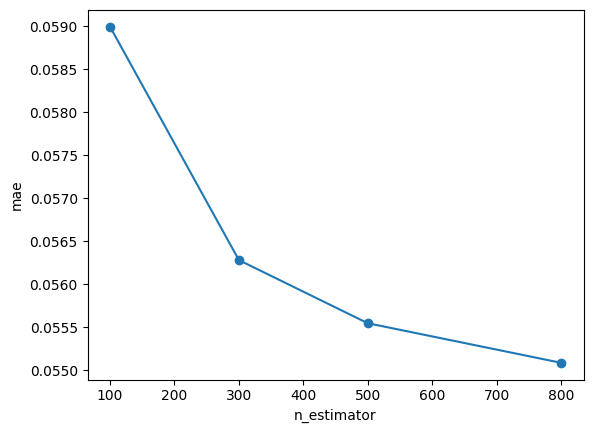

In [ ]:
#画图：
plt.plot(n_estimators,score,'o-')
plt.ylabel('mae')
plt.xlabel("n_estimator")
print("最好的n_estimators{}".format(n_estimators[np.argmin(score)]))


In [ ]:
score1=[]
max_depths=[3,5,7,9,11,13]
for md in max_depths:
    lgbm=lgb.LGBMRegressor(boosting_type="gbdt",
                           num_leaves=31,
                           learning_rate=0.1,
                           max_depth=md,
                           n_estimators=800,
                           min_child_samples=20,
                           n_jobs=-1)
    lgbm.fit(x_train,y_train,eval_set=[(x_test,y_test)],eval_metric="l1",early_stopping_rounds=5)
    y_pre=lgbm.predict(x_test)
    mae=mean_absolute_error(y_test,y_pre)
    score1.append(mae)
    print("本次结果输出的mae值为:",mae)

[1]	valid_0's l1: 0.245769	valid_0's l2: 0.0799976
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.226508	valid_0's l2: 0.0683274
[3]	valid_0's l1: 0.209641	valid_0's l2: 0.0588789
[4]	valid_0's l1: 0.194442	valid_0's l2: 0.0511069
[5]	valid_0's l1: 0.181239	valid_0's l2: 0.0448052
[6]	valid_0's l1: 0.169453	valid_0's l2: 0.0396091
[7]	valid_0's l1: 0.159216	valid_0's l2: 0.035382
[8]	valid_0's l1: 0.149826	valid_0's l2: 0.0317961
[9]	valid_0's l1: 0.141846	valid_0's l2: 0.0289265
[10]	valid_0's l1: 0.134474	valid_0's l2: 0.0264772
[11]	valid_0's l1: 0.128228	valid_0's l2: 0.0245051
[12]	valid_0's l1: 0.122669	valid_0's l2: 0.0228266
[13]	valid_0's l1: 0.117539	valid_0's l2: 0.0213799
[14]	valid_0's l1: 0.113258	valid_0's l2: 0.0201772
[15]	valid_0's l1: 0.109452	valid_0's l2: 0.0192058
[16]	valid_0's l1: 0.105981	valid_0's l2: 0.0183472
[17]	valid_0's l1: 0.103079	valid_0's l2: 0.0176278
[18]	valid_0's l1: 0.100129	valid_0's l2: 0.0169205
[19]	valid_0's

[157]	valid_0's l1: 0.0636042	valid_0's l2: 0.00810363
[158]	valid_0's l1: 0.0635754	valid_0's l2: 0.00809581
[159]	valid_0's l1: 0.0635284	valid_0's l2: 0.0080862
[160]	valid_0's l1: 0.0634898	valid_0's l2: 0.00808017
[161]	valid_0's l1: 0.0634796	valid_0's l2: 0.00807602
[162]	valid_0's l1: 0.063461	valid_0's l2: 0.00807007
[163]	valid_0's l1: 0.0633367	valid_0's l2: 0.00802673
[164]	valid_0's l1: 0.0632987	valid_0's l2: 0.0080158
[165]	valid_0's l1: 0.0632679	valid_0's l2: 0.00800678
[166]	valid_0's l1: 0.0632248	valid_0's l2: 0.00799717
[167]	valid_0's l1: 0.0631661	valid_0's l2: 0.00797066
[168]	valid_0's l1: 0.0631324	valid_0's l2: 0.00796174
[169]	valid_0's l1: 0.063108	valid_0's l2: 0.00795481
[170]	valid_0's l1: 0.0630972	valid_0's l2: 0.00794864
[171]	valid_0's l1: 0.063073	valid_0's l2: 0.00794447
[172]	valid_0's l1: 0.0630198	valid_0's l2: 0.00793276
[173]	valid_0's l1: 0.0629724	valid_0's l2: 0.00791412
[174]	valid_0's l1: 0.0629498	valid_0's l2: 0.00790802
[175]	valid_0's

[316]	valid_0's l1: 0.0601081	valid_0's l2: 0.00714943
[317]	valid_0's l1: 0.0600889	valid_0's l2: 0.00714571
[318]	valid_0's l1: 0.0600838	valid_0's l2: 0.00714343
[319]	valid_0's l1: 0.0600612	valid_0's l2: 0.00713972
[320]	valid_0's l1: 0.0600555	valid_0's l2: 0.00713739
[321]	valid_0's l1: 0.060022	valid_0's l2: 0.00712722
[322]	valid_0's l1: 0.0600169	valid_0's l2: 0.00712365
[323]	valid_0's l1: 0.0600152	valid_0's l2: 0.00712247
[324]	valid_0's l1: 0.0600106	valid_0's l2: 0.00712158
[325]	valid_0's l1: 0.059996	valid_0's l2: 0.00711809
[326]	valid_0's l1: 0.0599886	valid_0's l2: 0.0071163
[327]	valid_0's l1: 0.0599809	valid_0's l2: 0.00711427
[328]	valid_0's l1: 0.059972	valid_0's l2: 0.00711293
[329]	valid_0's l1: 0.0599577	valid_0's l2: 0.00710766
[330]	valid_0's l1: 0.0599562	valid_0's l2: 0.00710504
[331]	valid_0's l1: 0.0599566	valid_0's l2: 0.00710384
[332]	valid_0's l1: 0.0599452	valid_0's l2: 0.00710027
[333]	valid_0's l1: 0.0599366	valid_0's l2: 0.00709902
[334]	valid_0'

[471]	valid_0's l1: 0.0586473	valid_0's l2: 0.00677891
[472]	valid_0's l1: 0.0586421	valid_0's l2: 0.00677788
[473]	valid_0's l1: 0.0586366	valid_0's l2: 0.00677661
[474]	valid_0's l1: 0.0586154	valid_0's l2: 0.00677247
[475]	valid_0's l1: 0.0586103	valid_0's l2: 0.00677168
[476]	valid_0's l1: 0.058601	valid_0's l2: 0.00677036
[477]	valid_0's l1: 0.0585908	valid_0's l2: 0.00676715
[478]	valid_0's l1: 0.0585894	valid_0's l2: 0.00676537
[479]	valid_0's l1: 0.0585872	valid_0's l2: 0.00676472
[480]	valid_0's l1: 0.0585846	valid_0's l2: 0.00676419
[481]	valid_0's l1: 0.0585759	valid_0's l2: 0.00676358
[482]	valid_0's l1: 0.0585691	valid_0's l2: 0.00676175
[483]	valid_0's l1: 0.0585677	valid_0's l2: 0.00676142
[484]	valid_0's l1: 0.0585591	valid_0's l2: 0.00676002
[485]	valid_0's l1: 0.0585463	valid_0's l2: 0.00675565
[486]	valid_0's l1: 0.0585427	valid_0's l2: 0.00675495
[487]	valid_0's l1: 0.0585402	valid_0's l2: 0.00675401
[488]	valid_0's l1: 0.058541	valid_0's l2: 0.00675361
[489]	valid_

[622]	valid_0's l1: 0.0578265	valid_0's l2: 0.00657815
[623]	valid_0's l1: 0.0578239	valid_0's l2: 0.00657749
[624]	valid_0's l1: 0.057814	valid_0's l2: 0.00657577
[625]	valid_0's l1: 0.0578107	valid_0's l2: 0.00657533
[626]	valid_0's l1: 0.0578043	valid_0's l2: 0.00657326
[627]	valid_0's l1: 0.057801	valid_0's l2: 0.00657268
[628]	valid_0's l1: 0.0578002	valid_0's l2: 0.00657086
[629]	valid_0's l1: 0.0577989	valid_0's l2: 0.00657063
[630]	valid_0's l1: 0.0577977	valid_0's l2: 0.00657025
[631]	valid_0's l1: 0.0577878	valid_0's l2: 0.00656966
[632]	valid_0's l1: 0.0577855	valid_0's l2: 0.00656901
[633]	valid_0's l1: 0.0577849	valid_0's l2: 0.00656874
[634]	valid_0's l1: 0.0577832	valid_0's l2: 0.00656803
[635]	valid_0's l1: 0.0577812	valid_0's l2: 0.00656747
[636]	valid_0's l1: 0.0577712	valid_0's l2: 0.00656496
[637]	valid_0's l1: 0.0577673	valid_0's l2: 0.00656393
[638]	valid_0's l1: 0.0577492	valid_0's l2: 0.00655992
[639]	valid_0's l1: 0.0577465	valid_0's l2: 0.00655957
[640]	valid_

[779]	valid_0's l1: 0.0573384	valid_0's l2: 0.00646522
[780]	valid_0's l1: 0.0573378	valid_0's l2: 0.00646497
[781]	valid_0's l1: 0.0573366	valid_0's l2: 0.00646473
[782]	valid_0's l1: 0.0573362	valid_0's l2: 0.00646469
[783]	valid_0's l1: 0.0573339	valid_0's l2: 0.00646418
[784]	valid_0's l1: 0.0573329	valid_0's l2: 0.0064639
[785]	valid_0's l1: 0.0573319	valid_0's l2: 0.00646373
[786]	valid_0's l1: 0.0573303	valid_0's l2: 0.00646344
[787]	valid_0's l1: 0.0573283	valid_0's l2: 0.00646297
[788]	valid_0's l1: 0.0573227	valid_0's l2: 0.00646182
[789]	valid_0's l1: 0.0573229	valid_0's l2: 0.00646178
[790]	valid_0's l1: 0.057322	valid_0's l2: 0.00646133
[791]	valid_0's l1: 0.0573222	valid_0's l2: 0.00646136
[792]	valid_0's l1: 0.0573197	valid_0's l2: 0.00645994
[793]	valid_0's l1: 0.0573166	valid_0's l2: 0.00645925
[794]	valid_0's l1: 0.0573157	valid_0's l2: 0.00645894
[795]	valid_0's l1: 0.0573136	valid_0's l2: 0.00645851
[796]	valid_0's l1: 0.0573126	valid_0's l2: 0.00645847
[797]	valid_

[128]	valid_0's l1: 0.0580856	valid_0's l2: 0.00665656
[129]	valid_0's l1: 0.0580691	valid_0's l2: 0.00665338
[130]	valid_0's l1: 0.0580465	valid_0's l2: 0.00664945
[131]	valid_0's l1: 0.0580151	valid_0's l2: 0.00663791
[132]	valid_0's l1: 0.0579973	valid_0's l2: 0.00663286
[133]	valid_0's l1: 0.0579774	valid_0's l2: 0.00662905
[134]	valid_0's l1: 0.0579632	valid_0's l2: 0.00662594
[135]	valid_0's l1: 0.0579475	valid_0's l2: 0.00662318
[136]	valid_0's l1: 0.0579266	valid_0's l2: 0.00661913
[137]	valid_0's l1: 0.0579199	valid_0's l2: 0.00661715
[138]	valid_0's l1: 0.0579111	valid_0's l2: 0.00661446
[139]	valid_0's l1: 0.0579082	valid_0's l2: 0.00661329
[140]	valid_0's l1: 0.0578957	valid_0's l2: 0.00661012
[141]	valid_0's l1: 0.0578848	valid_0's l2: 0.00660763
[142]	valid_0's l1: 0.0578581	valid_0's l2: 0.00660199
[143]	valid_0's l1: 0.0578512	valid_0's l2: 0.00659952
[144]	valid_0's l1: 0.0578222	valid_0's l2: 0.00659295
[145]	valid_0's l1: 0.057816	valid_0's l2: 0.00659131
[146]	valid

[280]	valid_0's l1: 0.0563835	valid_0's l2: 0.00625816
[281]	valid_0's l1: 0.0563774	valid_0's l2: 0.00625691
[282]	valid_0's l1: 0.0563716	valid_0's l2: 0.00625556
[283]	valid_0's l1: 0.0563675	valid_0's l2: 0.00625457
[284]	valid_0's l1: 0.0563574	valid_0's l2: 0.00625377
[285]	valid_0's l1: 0.0563505	valid_0's l2: 0.00625258
[286]	valid_0's l1: 0.0563476	valid_0's l2: 0.00625187
[287]	valid_0's l1: 0.0563454	valid_0's l2: 0.00625122
[288]	valid_0's l1: 0.0563431	valid_0's l2: 0.00625078
[289]	valid_0's l1: 0.056334	valid_0's l2: 0.0062488
[290]	valid_0's l1: 0.0563325	valid_0's l2: 0.00624854
[291]	valid_0's l1: 0.0563258	valid_0's l2: 0.00624664
[292]	valid_0's l1: 0.0563241	valid_0's l2: 0.00624654
[293]	valid_0's l1: 0.0563213	valid_0's l2: 0.0062461
[294]	valid_0's l1: 0.0563194	valid_0's l2: 0.00624581
[295]	valid_0's l1: 0.0563096	valid_0's l2: 0.00624396
[296]	valid_0's l1: 0.0563076	valid_0's l2: 0.00624324
[297]	valid_0's l1: 0.056306	valid_0's l2: 0.00624268
[298]	valid_0'

[436]	valid_0's l1: 0.0557041	valid_0's l2: 0.00612409
[437]	valid_0's l1: 0.0557023	valid_0's l2: 0.0061237
[438]	valid_0's l1: 0.0557004	valid_0's l2: 0.00612351
[439]	valid_0's l1: 0.0556988	valid_0's l2: 0.00612311
[440]	valid_0's l1: 0.0556972	valid_0's l2: 0.00612285
[441]	valid_0's l1: 0.0556949	valid_0's l2: 0.00612267
[442]	valid_0's l1: 0.0556935	valid_0's l2: 0.00612243
[443]	valid_0's l1: 0.0556935	valid_0's l2: 0.00612234
[444]	valid_0's l1: 0.055694	valid_0's l2: 0.00612226
[445]	valid_0's l1: 0.0556915	valid_0's l2: 0.00612185
[446]	valid_0's l1: 0.0556894	valid_0's l2: 0.00612143
[447]	valid_0's l1: 0.0556848	valid_0's l2: 0.0061207
[448]	valid_0's l1: 0.0556815	valid_0's l2: 0.00611954
[449]	valid_0's l1: 0.05568	valid_0's l2: 0.00611894
[450]	valid_0's l1: 0.0556751	valid_0's l2: 0.00611829
[451]	valid_0's l1: 0.0556725	valid_0's l2: 0.00611764
[452]	valid_0's l1: 0.0556589	valid_0's l2: 0.00611545
[453]	valid_0's l1: 0.0556577	valid_0's l2: 0.00611518
[454]	valid_0's

[592]	valid_0's l1: 0.0553812	valid_0's l2: 0.00605807
[593]	valid_0's l1: 0.0553799	valid_0's l2: 0.00605791
[594]	valid_0's l1: 0.0553776	valid_0's l2: 0.00605759
[595]	valid_0's l1: 0.0553756	valid_0's l2: 0.00605728
[596]	valid_0's l1: 0.0553754	valid_0's l2: 0.00605726
[597]	valid_0's l1: 0.0553721	valid_0's l2: 0.00605697
[598]	valid_0's l1: 0.0553719	valid_0's l2: 0.0060569
[599]	valid_0's l1: 0.0553713	valid_0's l2: 0.00605691
[600]	valid_0's l1: 0.0553707	valid_0's l2: 0.00605683
[601]	valid_0's l1: 0.0553645	valid_0's l2: 0.00605548
[602]	valid_0's l1: 0.0553593	valid_0's l2: 0.00605519
[603]	valid_0's l1: 0.0553587	valid_0's l2: 0.00605522
[604]	valid_0's l1: 0.0553562	valid_0's l2: 0.00605476
[605]	valid_0's l1: 0.055352	valid_0's l2: 0.00605359
[606]	valid_0's l1: 0.0553509	valid_0's l2: 0.00605345
[607]	valid_0's l1: 0.05535	valid_0's l2: 0.00605316
[608]	valid_0's l1: 0.0553503	valid_0's l2: 0.00605313
[609]	valid_0's l1: 0.0553499	valid_0's l2: 0.00605285
[610]	valid_0'

[745]	valid_0's l1: 0.0551508	valid_0's l2: 0.00601265
[746]	valid_0's l1: 0.0551492	valid_0's l2: 0.0060125
[747]	valid_0's l1: 0.0551434	valid_0's l2: 0.00601182
[748]	valid_0's l1: 0.055143	valid_0's l2: 0.00601182
[749]	valid_0's l1: 0.0551429	valid_0's l2: 0.00601188
[750]	valid_0's l1: 0.0551416	valid_0's l2: 0.00601153
[751]	valid_0's l1: 0.0551411	valid_0's l2: 0.00601139
[752]	valid_0's l1: 0.0551392	valid_0's l2: 0.00601103
[753]	valid_0's l1: 0.0551387	valid_0's l2: 0.00601105
[754]	valid_0's l1: 0.055138	valid_0's l2: 0.00601083
[755]	valid_0's l1: 0.0551379	valid_0's l2: 0.0060108
[756]	valid_0's l1: 0.0551366	valid_0's l2: 0.00601053
[757]	valid_0's l1: 0.0551349	valid_0's l2: 0.00600993
[758]	valid_0's l1: 0.0551335	valid_0's l2: 0.00600964
[759]	valid_0's l1: 0.0551321	valid_0's l2: 0.00600919
[760]	valid_0's l1: 0.0551303	valid_0's l2: 0.00600876
[761]	valid_0's l1: 0.0551288	valid_0's l2: 0.00600844
[762]	valid_0's l1: 0.0551274	valid_0's l2: 0.00600834
[763]	valid_0'

[98]	valid_0's l1: 0.0578309	valid_0's l2: 0.00655838
[99]	valid_0's l1: 0.0577931	valid_0's l2: 0.00655099
[100]	valid_0's l1: 0.0577775	valid_0's l2: 0.00654505
[101]	valid_0's l1: 0.0577542	valid_0's l2: 0.00654138
[102]	valid_0's l1: 0.0577201	valid_0's l2: 0.00653466
[103]	valid_0's l1: 0.0576859	valid_0's l2: 0.00652554
[104]	valid_0's l1: 0.0576539	valid_0's l2: 0.00651914
[105]	valid_0's l1: 0.057632	valid_0's l2: 0.00651417
[106]	valid_0's l1: 0.057618	valid_0's l2: 0.00651032
[107]	valid_0's l1: 0.0575974	valid_0's l2: 0.00650635
[108]	valid_0's l1: 0.057574	valid_0's l2: 0.00650155
[109]	valid_0's l1: 0.0575518	valid_0's l2: 0.00649687
[110]	valid_0's l1: 0.0575317	valid_0's l2: 0.00649281
[111]	valid_0's l1: 0.0575044	valid_0's l2: 0.00648619
[112]	valid_0's l1: 0.057479	valid_0's l2: 0.0064805
[113]	valid_0's l1: 0.0574489	valid_0's l2: 0.00647281
[114]	valid_0's l1: 0.0574211	valid_0's l2: 0.00646353
[115]	valid_0's l1: 0.057405	valid_0's l2: 0.00646024
[116]	valid_0's l1

[252]	valid_0's l1: 0.0559907	valid_0's l2: 0.00615956
[253]	valid_0's l1: 0.0559877	valid_0's l2: 0.00615914
[254]	valid_0's l1: 0.0559864	valid_0's l2: 0.00615886
[255]	valid_0's l1: 0.0559843	valid_0's l2: 0.00615828
[256]	valid_0's l1: 0.0559675	valid_0's l2: 0.00615509
[257]	valid_0's l1: 0.0559634	valid_0's l2: 0.00615399
[258]	valid_0's l1: 0.0559597	valid_0's l2: 0.00615308
[259]	valid_0's l1: 0.0559517	valid_0's l2: 0.00615169
[260]	valid_0's l1: 0.05595	valid_0's l2: 0.00615128
[261]	valid_0's l1: 0.0559448	valid_0's l2: 0.00615032
[262]	valid_0's l1: 0.0559439	valid_0's l2: 0.00615013
[263]	valid_0's l1: 0.0559419	valid_0's l2: 0.00614962
[264]	valid_0's l1: 0.0559396	valid_0's l2: 0.0061491
[265]	valid_0's l1: 0.0559383	valid_0's l2: 0.006149
[266]	valid_0's l1: 0.0559339	valid_0's l2: 0.00614769
[267]	valid_0's l1: 0.055923	valid_0's l2: 0.00614703
[268]	valid_0's l1: 0.0559165	valid_0's l2: 0.00614582
[269]	valid_0's l1: 0.0559131	valid_0's l2: 0.00614497
[270]	valid_0's 

[404]	valid_0's l1: 0.0555009	valid_0's l2: 0.00606689
[405]	valid_0's l1: 0.055498	valid_0's l2: 0.00606617
[406]	valid_0's l1: 0.0554962	valid_0's l2: 0.00606568
[407]	valid_0's l1: 0.0554947	valid_0's l2: 0.00606531
[408]	valid_0's l1: 0.0554832	valid_0's l2: 0.00606364
[409]	valid_0's l1: 0.0554833	valid_0's l2: 0.00606366
[410]	valid_0's l1: 0.0554821	valid_0's l2: 0.00606346
[411]	valid_0's l1: 0.0554792	valid_0's l2: 0.00606285
[412]	valid_0's l1: 0.05548	valid_0's l2: 0.00606296
[413]	valid_0's l1: 0.0554681	valid_0's l2: 0.00606109
[414]	valid_0's l1: 0.0554672	valid_0's l2: 0.0060607
[415]	valid_0's l1: 0.0554662	valid_0's l2: 0.00606054
[416]	valid_0's l1: 0.0554621	valid_0's l2: 0.00605944
[417]	valid_0's l1: 0.0554619	valid_0's l2: 0.00605961
[418]	valid_0's l1: 0.0554606	valid_0's l2: 0.00605934
[419]	valid_0's l1: 0.055461	valid_0's l2: 0.00605932
[420]	valid_0's l1: 0.0554587	valid_0's l2: 0.00605865
[421]	valid_0's l1: 0.0554543	valid_0's l2: 0.00605785
[422]	valid_0's

[561]	valid_0's l1: 0.0552187	valid_0's l2: 0.00601423
[562]	valid_0's l1: 0.055219	valid_0's l2: 0.00601429
[563]	valid_0's l1: 0.0552182	valid_0's l2: 0.00601421
[564]	valid_0's l1: 0.0552166	valid_0's l2: 0.0060139
[565]	valid_0's l1: 0.0552089	valid_0's l2: 0.0060126
[566]	valid_0's l1: 0.0552089	valid_0's l2: 0.00601261
[567]	valid_0's l1: 0.0552083	valid_0's l2: 0.00601261
[568]	valid_0's l1: 0.055206	valid_0's l2: 0.00601218
[569]	valid_0's l1: 0.055203	valid_0's l2: 0.00601138
[570]	valid_0's l1: 0.0552019	valid_0's l2: 0.00601095
[571]	valid_0's l1: 0.0552014	valid_0's l2: 0.0060108
[572]	valid_0's l1: 0.0552013	valid_0's l2: 0.00601078
[573]	valid_0's l1: 0.0552013	valid_0's l2: 0.00601073
[574]	valid_0's l1: 0.0551998	valid_0's l2: 0.00601056
[575]	valid_0's l1: 0.0551987	valid_0's l2: 0.00601029
[576]	valid_0's l1: 0.0551979	valid_0's l2: 0.00601002
[577]	valid_0's l1: 0.0551975	valid_0's l2: 0.00600976
[578]	valid_0's l1: 0.0551973	valid_0's l2: 0.00600954
[579]	valid_0's 

[714]	valid_0's l1: 0.0549768	valid_0's l2: 0.00597313
[715]	valid_0's l1: 0.0549773	valid_0's l2: 0.00597328
[716]	valid_0's l1: 0.0549743	valid_0's l2: 0.00597311
[717]	valid_0's l1: 0.0549741	valid_0's l2: 0.00597303
[718]	valid_0's l1: 0.0549738	valid_0's l2: 0.00597286
[719]	valid_0's l1: 0.0549732	valid_0's l2: 0.00597286
[720]	valid_0's l1: 0.0549719	valid_0's l2: 0.00597248
[721]	valid_0's l1: 0.0549702	valid_0's l2: 0.00597208
[722]	valid_0's l1: 0.0549692	valid_0's l2: 0.00597191
[723]	valid_0's l1: 0.0549692	valid_0's l2: 0.00597194
[724]	valid_0's l1: 0.0549679	valid_0's l2: 0.00597172
[725]	valid_0's l1: 0.0549661	valid_0's l2: 0.00597155
[726]	valid_0's l1: 0.0549658	valid_0's l2: 0.00597142
[727]	valid_0's l1: 0.0549649	valid_0's l2: 0.00597115
[728]	valid_0's l1: 0.0549646	valid_0's l2: 0.00597109
[729]	valid_0's l1: 0.0549645	valid_0's l2: 0.00597101
[730]	valid_0's l1: 0.0549625	valid_0's l2: 0.00597057
[731]	valid_0's l1: 0.0549604	valid_0's l2: 0.00597024
[732]	vali

[64]	valid_0's l1: 0.0593297	valid_0's l2: 0.00689216
[65]	valid_0's l1: 0.0592517	valid_0's l2: 0.0068728
[66]	valid_0's l1: 0.0591547	valid_0's l2: 0.00685231
[67]	valid_0's l1: 0.0590713	valid_0's l2: 0.0068303
[68]	valid_0's l1: 0.0590022	valid_0's l2: 0.00681927
[69]	valid_0's l1: 0.058939	valid_0's l2: 0.00680397
[70]	valid_0's l1: 0.0588879	valid_0's l2: 0.00679071
[71]	valid_0's l1: 0.0588106	valid_0's l2: 0.00677281
[72]	valid_0's l1: 0.0587529	valid_0's l2: 0.00676064
[73]	valid_0's l1: 0.0586994	valid_0's l2: 0.006748
[74]	valid_0's l1: 0.058637	valid_0's l2: 0.00673464
[75]	valid_0's l1: 0.0585683	valid_0's l2: 0.00671936
[76]	valid_0's l1: 0.0585222	valid_0's l2: 0.00671056
[77]	valid_0's l1: 0.0584734	valid_0's l2: 0.00669938
[78]	valid_0's l1: 0.0584134	valid_0's l2: 0.00668577
[79]	valid_0's l1: 0.0583723	valid_0's l2: 0.00667808
[80]	valid_0's l1: 0.0583358	valid_0's l2: 0.0066685
[81]	valid_0's l1: 0.0582827	valid_0's l2: 0.00665609
[82]	valid_0's l1: 0.0582577	valid_

[218]	valid_0's l1: 0.0560238	valid_0's l2: 0.00616649
[219]	valid_0's l1: 0.0560229	valid_0's l2: 0.00616621
[220]	valid_0's l1: 0.0560168	valid_0's l2: 0.00616509
[221]	valid_0's l1: 0.0560081	valid_0's l2: 0.00616367
[222]	valid_0's l1: 0.0560063	valid_0's l2: 0.00616303
[223]	valid_0's l1: 0.0560015	valid_0's l2: 0.00616211
[224]	valid_0's l1: 0.0559981	valid_0's l2: 0.00616149
[225]	valid_0's l1: 0.0559956	valid_0's l2: 0.00616153
[226]	valid_0's l1: 0.0559929	valid_0's l2: 0.00616107
[227]	valid_0's l1: 0.0559834	valid_0's l2: 0.00615907
[228]	valid_0's l1: 0.0559818	valid_0's l2: 0.00615857
[229]	valid_0's l1: 0.0559791	valid_0's l2: 0.00615839
[230]	valid_0's l1: 0.055971	valid_0's l2: 0.00615658
[231]	valid_0's l1: 0.0559701	valid_0's l2: 0.00615651
[232]	valid_0's l1: 0.0559624	valid_0's l2: 0.00615586
[233]	valid_0's l1: 0.0559577	valid_0's l2: 0.00615491
[234]	valid_0's l1: 0.0559561	valid_0's l2: 0.00615404
[235]	valid_0's l1: 0.05595	valid_0's l2: 0.00615288
[236]	valid_0

[371]	valid_0's l1: 0.0555292	valid_0's l2: 0.00607401
[372]	valid_0's l1: 0.0555277	valid_0's l2: 0.00607389
[373]	valid_0's l1: 0.0555267	valid_0's l2: 0.00607324
[374]	valid_0's l1: 0.0555254	valid_0's l2: 0.00607314
[375]	valid_0's l1: 0.0555242	valid_0's l2: 0.00607255
[376]	valid_0's l1: 0.0555205	valid_0's l2: 0.00607215
[377]	valid_0's l1: 0.0555206	valid_0's l2: 0.00607218
[378]	valid_0's l1: 0.0555193	valid_0's l2: 0.0060719
[379]	valid_0's l1: 0.0555168	valid_0's l2: 0.0060713
[380]	valid_0's l1: 0.055511	valid_0's l2: 0.00607004
[381]	valid_0's l1: 0.0555032	valid_0's l2: 0.006069
[382]	valid_0's l1: 0.0554971	valid_0's l2: 0.00606802
[383]	valid_0's l1: 0.0554969	valid_0's l2: 0.00606806
[384]	valid_0's l1: 0.0554936	valid_0's l2: 0.00606748
[385]	valid_0's l1: 0.0554933	valid_0's l2: 0.00606775
[386]	valid_0's l1: 0.0554889	valid_0's l2: 0.00606702
[387]	valid_0's l1: 0.0554883	valid_0's l2: 0.00606682
[388]	valid_0's l1: 0.0554895	valid_0's l2: 0.00606711
[389]	valid_0's

[523]	valid_0's l1: 0.0552443	valid_0's l2: 0.00602252
[524]	valid_0's l1: 0.0552401	valid_0's l2: 0.00602162
[525]	valid_0's l1: 0.0552353	valid_0's l2: 0.00602053
[526]	valid_0's l1: 0.0552342	valid_0's l2: 0.00602019
[527]	valid_0's l1: 0.0552312	valid_0's l2: 0.00601994
[528]	valid_0's l1: 0.0552308	valid_0's l2: 0.00601966
[529]	valid_0's l1: 0.0552236	valid_0's l2: 0.0060179
[530]	valid_0's l1: 0.0552224	valid_0's l2: 0.00601768
[531]	valid_0's l1: 0.0552156	valid_0's l2: 0.00601707
[532]	valid_0's l1: 0.0552146	valid_0's l2: 0.0060168
[533]	valid_0's l1: 0.0552121	valid_0's l2: 0.00601648
[534]	valid_0's l1: 0.0552128	valid_0's l2: 0.00601651
[535]	valid_0's l1: 0.0552124	valid_0's l2: 0.00601639
[536]	valid_0's l1: 0.0552128	valid_0's l2: 0.00601639
[537]	valid_0's l1: 0.0552135	valid_0's l2: 0.00601677
[538]	valid_0's l1: 0.0552115	valid_0's l2: 0.00601612
[539]	valid_0's l1: 0.0552082	valid_0's l2: 0.00601556
[540]	valid_0's l1: 0.055207	valid_0's l2: 0.00601539
[541]	valid_0

[679]	valid_0's l1: 0.055043	valid_0's l2: 0.00598504
[680]	valid_0's l1: 0.055041	valid_0's l2: 0.00598476
[681]	valid_0's l1: 0.0550406	valid_0's l2: 0.00598474
[682]	valid_0's l1: 0.0550404	valid_0's l2: 0.00598465
[683]	valid_0's l1: 0.0550366	valid_0's l2: 0.00598404
[684]	valid_0's l1: 0.0550349	valid_0's l2: 0.00598378
[685]	valid_0's l1: 0.0550349	valid_0's l2: 0.00598371
[686]	valid_0's l1: 0.0550347	valid_0's l2: 0.00598366
[687]	valid_0's l1: 0.0550349	valid_0's l2: 0.00598382
[688]	valid_0's l1: 0.0550345	valid_0's l2: 0.00598389
[689]	valid_0's l1: 0.0550343	valid_0's l2: 0.00598391
[690]	valid_0's l1: 0.0550343	valid_0's l2: 0.0059838
[691]	valid_0's l1: 0.055029	valid_0's l2: 0.00598392
Early stopping, best iteration is:
[686]	valid_0's l1: 0.0550347	valid_0's l2: 0.00598366
本次结果输出的mae值为: 0.05503465648170045
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's l1: 0.243962	valid_0's l2: 0.078976
Training unti

[135]	valid_0's l1: 0.056841	valid_0's l2: 0.00633249
[136]	valid_0's l1: 0.0568379	valid_0's l2: 0.00633118
[137]	valid_0's l1: 0.0568298	valid_0's l2: 0.00632868
[138]	valid_0's l1: 0.0568121	valid_0's l2: 0.00632612
[139]	valid_0's l1: 0.0568028	valid_0's l2: 0.00632364
[140]	valid_0's l1: 0.0567896	valid_0's l2: 0.00632154


In [ ]:
plt.plot(max_depths,score1,'o-')
plt.ylabel('mae')
plt.xlabel("max_depths")
print("最好的n_estimators{}".format(n_estimators[np.argmin(score1)]))